### 1. Introduction

2.1 Import Library

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

2.2 Read Dataset

In [7]:
# Load data dari file CSV
df = pd.read_csv("data_diabetes_clean.csv")

# Lihat 5 baris awal
print(df.head())

   Pregnancies  Glucose  BloodPressure   BMI   Age  Outcome
0          6.0    148.0           72.0  33.6  50.0        1
1          1.0     85.0           66.0  26.6  31.0        0
2          8.0    183.0           64.0  23.3  32.0        1
3          1.0     89.0           66.0  28.1  21.0        0
4          0.0    137.0           40.0  43.1  33.0        1


In [8]:
import pandas as pd
df = pd.read_csv('data_diabetes_clean.csv')
print("\n=== Statistik Deskriptif ===")
print(df.describe(include='all').to_string())



=== Statistik Deskriptif ===
       Pregnancies     Glucose  BloodPressure         BMI         Age     Outcome
count   768.000000  768.000000     768.000000  768.000000  768.000000  768.000000
mean      3.845052  121.621094      72.371354   32.428542   33.240885    0.348958
std       3.369578   30.510797      12.198109    6.885106   11.760232    0.476951
min       0.000000   44.000000      24.000000   18.200000   21.000000    0.000000
25%       1.000000   99.000000      64.000000   27.500000   24.000000    0.000000
50%       3.000000  117.000000      72.000000   32.150000   29.000000    0.000000
75%       6.000000  141.000000      80.000000   36.600000   41.000000    1.000000
max      17.000000  199.000000     122.000000   67.100000   81.000000    1.000000


## 4. Exploratory Data Analysis (EDA)

# 1. Analisis Univariate

Analisis univariat dilakukan untuk memahami distribusi masing-masing variabel secara individu.

<Figure size 1200x800 with 0 Axes>

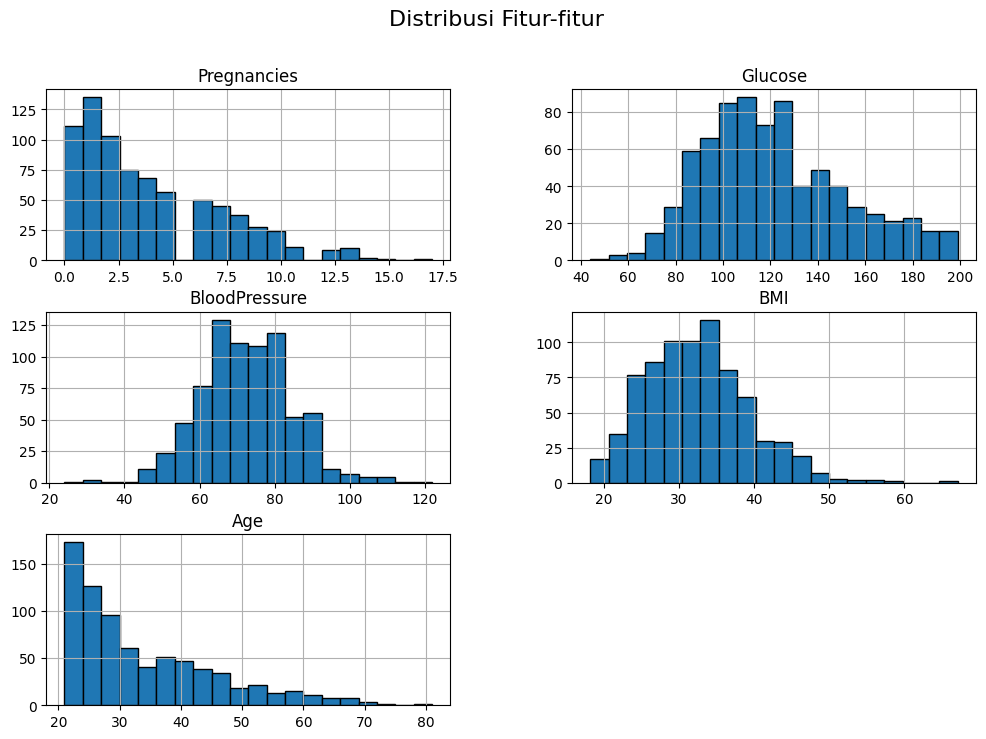

In [ ]:
# 1. Visualisasi distribusi fitur numerik
plt.figure(figsize=(12, 8))
df.drop('Outcome', axis=1).hist(bins=20, edgecolor='black', figsize=(12, 8))
plt.suptitle("Histogram Distribusi Fitur-fitur", fontsize=16)
plt.show()

C:\Users\Mega Global\AppData\Local\Temp\ipykernel_20364\949284937.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a = sns.countplot(x='Outcome', data=df, palette='Set2')


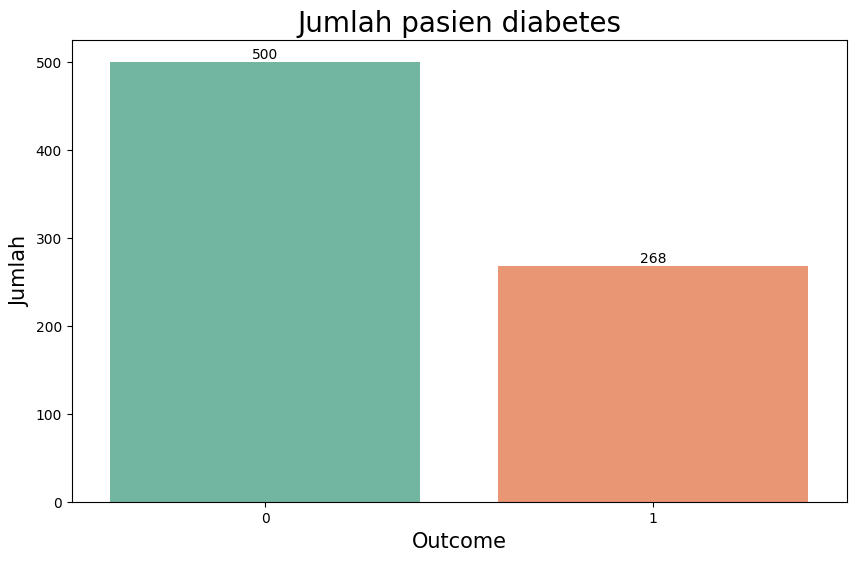

In [ ]:
# Distribusi Variabel Target (Outcome)
plt.figure(figsize=(10,6))
a = sns.countplot(x='Outcome', data=df, palette='Set2')
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.title('Bar Chart Jumlah pasien diabetes', fontsize=20)
plt.xlabel('Outcome', fontsize=15)
plt.ylabel('Jumlah', fontsize=15)
plt.show()

Data yang disajikan menggambarkan bahwa terdapat 268 orang yang mengalami diabetes, sedangkan sebanyak 500 orang tidak mengalami kondisi diabetes.

# 2. Analisis Bivariate

Analisis bivariat dilakukan untuk melihat hubungan dua variabel, misalnya antara Outcome dan variabel lain.

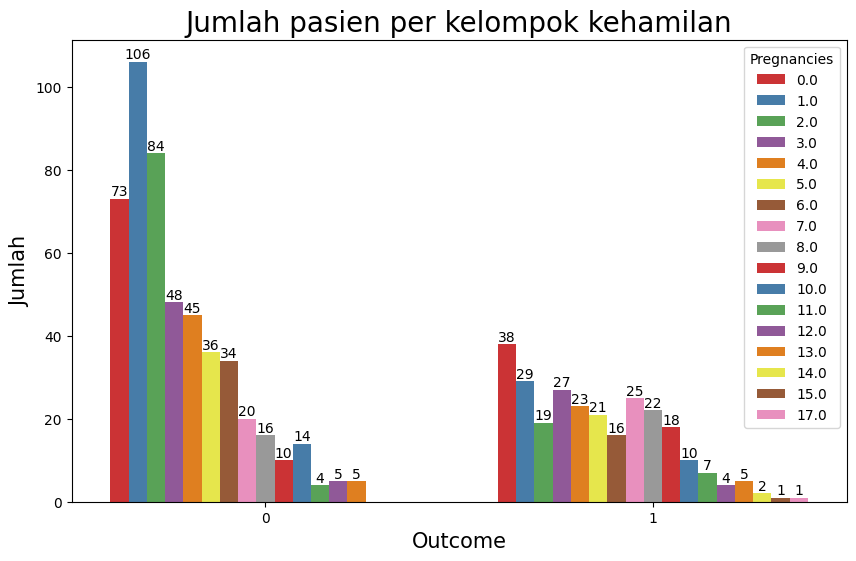

In [11]:
plt.figure(figsize=(10,6))
a = sns.countplot(x='Outcome', hue='Pregnancies', data=df, palette='Set1')
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.title('Jumlah pasien per kelompok kehamilan', fontsize=20)
plt.xlabel('Outcome', fontsize=15)
plt.ylabel('Jumlah', fontsize=15)
plt.show() 

Jumlah pasien perkelompok kehamilan yang paling banyak terkena diabets adalah 0 kehamilan dengan jumlah 38 orang lalu diikuti dengan 3 kehamilan dengan jumlah 27 orang dan yang paling sedikit adalah 17 kehamilan dengan jumlah 1 orang.

# 3. Analisis Multivariate

Analisis multivariat melihat hubungan lebih dari dua variabel.

In [12]:
# Menambahkan kolom kelompok umur
age_grup = []
for i in df['Age']:
    if i >= 17 and i <= 25:
        age_grup.append('Remaja Akhir')
    elif i >= 26 and i <= 35:
        age_grup.append('Dewasa Awal')
    elif i >= 36 and i <= 45:
        age_grup.append('Dewasa Akhir')
    elif i >= 46 and i <= 55:
        age_grup.append('Lansia Awal')
    elif i >= 56 and i <= 65:
        age_grup.append('Lansia Akhir')
    else:
        age_grup.append('Manula')
df['Age_grup'] = age_grup

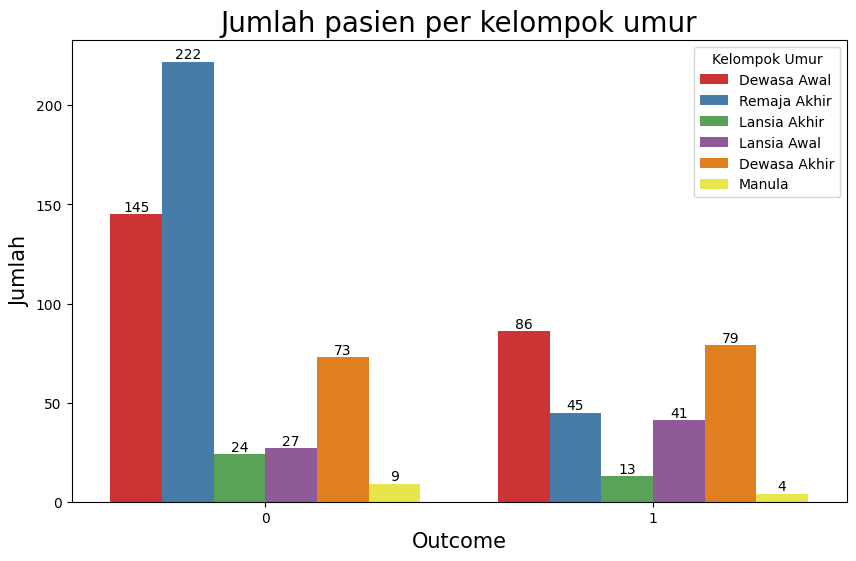

In [13]:
plt.figure(figsize=(10,6))
a = sns.countplot(x='Outcome', hue='Age_grup', data=df, palette='Set1')
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.title('Jumlah pasien per kelompok umur', fontsize=20)
plt.xlabel('Outcome', fontsize=15)
plt.ylabel('Jumlah', fontsize=15) 
plt.legend(loc='upper right', title='Kelompok Umur')  
plt.show() 

Banyak pasien yang terkena diabetes adalah yang berumur 26-35 tahun atau dewasa awal dengan jumlah 86 orang lalu diikutu dengan dewasa akhir yaitu 46-55 tahun dengan jumlah 79 orang dan yang paling sedikit adalah manula dengan jumlah 4 orang.

In [14]:
df[['Outcome', 'Age_grup']].value_counts()

Outcome  Age_grup    
0        Remaja Akhir    222
         Dewasa Awal     145
1        Dewasa Awal      86
         Dewasa Akhir     79
0        Dewasa Akhir     73
1        Remaja Akhir     45
         Lansia Awal      41
0        Lansia Awal      27
         Lansia Akhir     24
1        Lansia Akhir     13
0        Manula            9
1        Manula            4
Name: count, dtype: int64

In [15]:
BMI_grup = []
for i in df['BMI']:
    if i >= 0 and i <= 18.5:
        BMI_grup.append('Kurus')
    elif i >= 18.6 and i <= 22.9:
        BMI_grup.append('Normal')
    elif i >= 23 and i <= 24.9:
        BMI_grup.append('Gemuk')
    elif i >= 25 and i <= 29.9:
        BMI_grup.append('Obesitas')
    else:
        BMI_grup.append('Obesitas II')            

In [16]:
df['BMI_grup'] = BMI_grup
df

,Pregnancies,Glucose,BloodPressure,BMI,Age,Outcome,Age_grup,BMI_grup
0,6.0,148.0,72.0,33.6,50.0,1,Lansia Awal,Obesitas II
1,1.0,85.0,66.0,26.6,31.0,0,Dewasa Awal,Obesitas
2,8.0,183.0,64.0,23.3,32.0,1,Dewasa Awal,Gemuk
3,1.0,89.0,66.0,28.1,21.0,0,Remaja Akhir,Obesitas
4,0.0,137.0,40.0,43.1,33.0,1,Dewasa Awal,Obesitas II
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,32.9,63.0,0,Lansia Akhir,Obesitas II
764,2.0,122.0,70.0,36.8,27.0,0,Dewasa Awal,Obesitas II
765,5.0,121.0,72.0,26.2,30.0,0,Dewasa Awal,Obesitas
766,1.0,126.0,60.0,30.1,47.0,1,Lansia Awal,Obesitas II


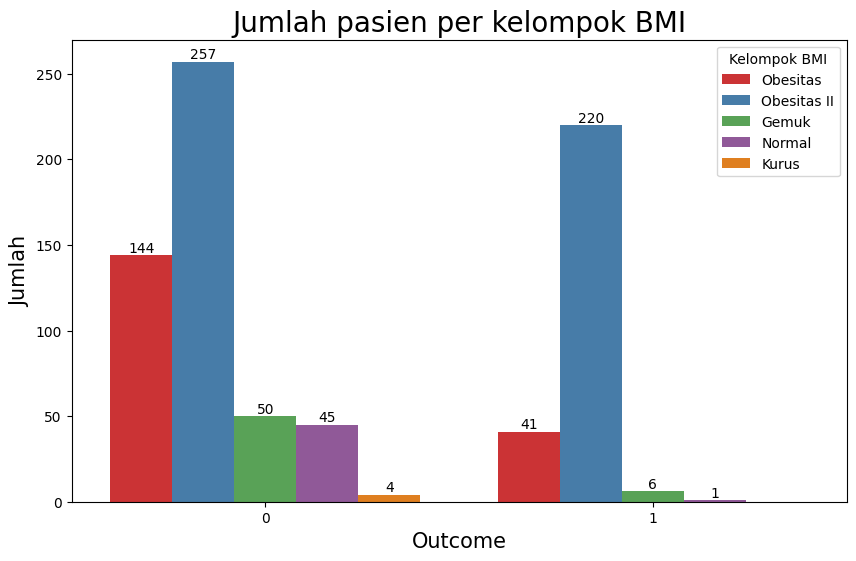

In [17]:
plt.figure(figsize=(10,6))
a = sns.countplot(x='Outcome', hue='BMI_grup', data=df, palette='Set1')
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.title('Jumlah pasien per kelompok BMI', fontsize=20)
plt.xlabel('Outcome', fontsize=15)
plt.ylabel('Jumlah', fontsize=15)
plt.legend(loc='upper right', title='Kelompok BMI')
plt.show()    

Berdasarkan kelompok BMI yang paling banyak terkena diabetes adalah yang memiliki BMI lebih dari 30 (Obesitasa II) dengan jumlah 219 orang lalu diikuti dengan BMI 25 - 29.9 (Obesitas) dengan jumlah 40 orang.

In [18]:
df[['Outcome', 'BMI_grup']].value_counts()

Outcome  BMI_grup   
0        Obesitas II    257
1        Obesitas II    220
0        Obesitas       144
         Gemuk           50
         Normal          45
1        Obesitas        41
         Gemuk            6
0        Kurus            4
1        Normal           1
Name: count, dtype: int64

In [19]:
data = df.drop(columns=['Age_grup', 'BMI_grup'])
print(data.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'Age', 'Outcome'], dtype='object')


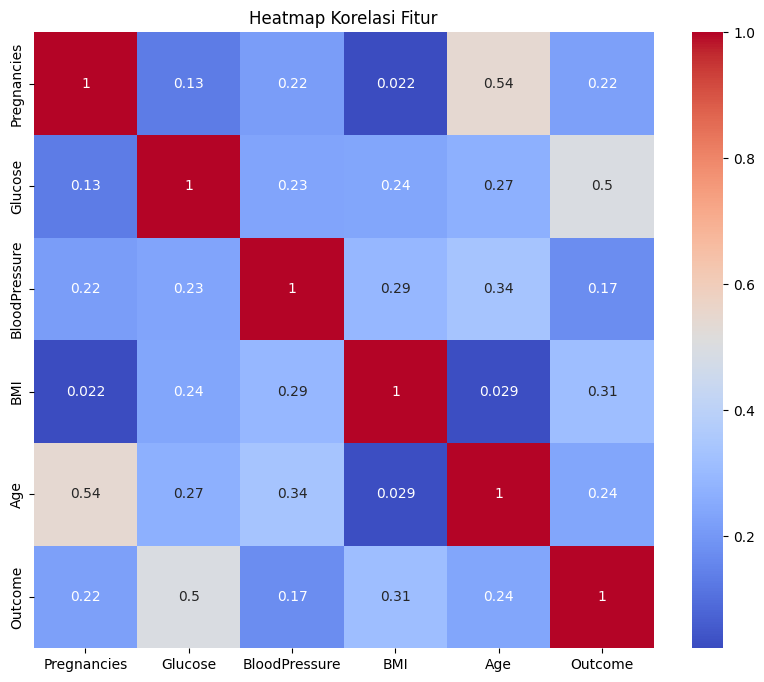

In [20]:
corr = data.corr()

plt.figure(figsize=(10, 8)) 
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Fitur")
plt.show()